In [46]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [50]:
환불매출 = pd.read_csv("C:/Users/alsrn/Downloads/20210819_105159_ProductPrdchart.csv")
장바구니 = pd.read_csv("C:/Users/alsrn/파이썬/지수산식3번째 도전/통계서비스_장바구니분석_담긴상품_20210819 (2).csv")
긍평 = pd.read_csv("C:/Users/alsrn/파이썬/지수산식3번째 도전/긍평.csv")

In [51]:
df = pd.merge(환불매출, 장바구니, how = "left", on = "주문상품명")
df2 = pd.merge(df, 긍평, how = "left", on = "주문상품명")

In [59]:
df2.dtypes

주문상품명      object
주문수         int64
환불수         int64
환불비율      float64
매출액         int64
장바구니수     float64
조회수       float64
장바구니비율    float64
장비        float64
긍정평균      float64
리뷰수       float64
평균평점      float64
긍정합계      float64
dtype: object

In [190]:
df2["평점긍정리뷰"] = df2["주문수"]  * df2["긍정평균"]
df2["평평평"] = df2["리뷰수"] * df2["평균평점"] * df2["긍정평균"]
df2["신뢰도"] = df2["평균평점"] * df2["장바구니수"] + df2["긍정평균"]
df2["안이탈율"] = df2["주문수"] * df2["장바구니수"]

<AxesSubplot:xlabel='매출액', ylabel='안이탈율'>

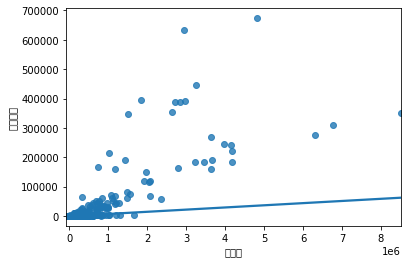

In [201]:
sns.regplot(df2['매출액'],df2["안이탈율"], lowess=True)

In [182]:
df2 = df2.drop(df2[df2["환불비율"] == 0].index)

<AxesSubplot:xlabel='매출액', ylabel='환불비율'>

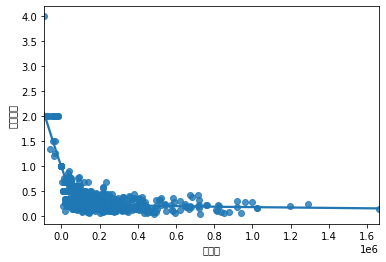

In [189]:
sns.regplot(df2['매출액'][50:],df2['환불비율'][50:], lowess=True)

In [115]:
df.shape

(3247, 9)

In [116]:
df2 = df2.dropna(axis=0)

In [197]:
x_data = df2[["안이탈율","환불비율","신뢰도"]] #X1 X2
target = df2[["매출액"]]# Y1

In [198]:
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [199]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     692.7
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          8.69e-241
Time:                        13:02:22   Log-Likelihood:                -13900.
No. Observations:                 976   AIC:                         2.781e+04
Df Residuals:                     972   BIC:                         2.783e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.511e+05   2.28e+04     11.011      0.000    2.06e+05    2.96e+05
안이탈율           8.0527      0.398     20.216      0.000       7.271       8.834
환불비율       -2.465e+05   3.17e+04     -7.783      0.000   -3.09e+05   -1.84e+05
신뢰도           56.5751     13.287      4.258      0.000      30.500      82.650
==============================================================================
Omnibus:                      999.104   Durbin-Watson:                   1.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166080.094
Skew:                           4.351   Prob(JB):                         0.00
Kurtosis:                      66.311   Cond. No.                     1.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
fitted_multi_model.params

const    251115.645147
안이탈율          8.052663
환불비율    -246491.075566
신뢰도          56.575078
dtype: float64

In [ ]:
환불비율 : -3
안이탈율 : 0.0001
신뢰도 : 0.0007